<a href="https://colab.research.google.com/github/kairamilanifitria/PurpleBox-Intern/blob/main/02_07_Best_Practice_with_InternVL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install lmdeploy>=0.6.4 --no-deps

In [2]:
!pip install mmengine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.7/452.7 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 8.8 MB/s eta 0:00:00


In [3]:
!pip install fire

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=24c6a5f903d32fdb8c91eadb56967284a4f8947f528def059f431689633d50f0
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lmdeploy 0.7.0.post2 requires fastapi, which is not installed.
lmdeploy 0.7.0.post2 requires mmengine-lite, which is not installed.
lmdeploy 0.7.0.post2 requires outlines<0.1.0, which is not installed.
lmdeploy 0.7.0.post2 requires pynvml, which is not installed.
lmdeploy 0.7.0.post2 requires shortuuid, which is not installed.
lmdeploy 0.7.0.post2 requires tiktoken, which is not installed.
lmdeploy 0.7.0.post2 requires uvi

In [6]:
!pip install decord

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 78.4 MB/s eta 0:00:00


In [7]:
import numpy as np
import torch
import torchvision.transforms as T
from decord import VideoReader, cpu
from PIL import Image
from torchvision.transforms.functional import InterpolationMode
from transformers import AutoModel, AutoTokenizer

path = 'OpenGVLab/InternVL2_5-1B'
model = AutoModel.from_pretrained(
    path,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    use_flash_attn=True,
    trust_remote_code=True).eval().cuda()
tokenizer = AutoTokenizer.from_pretrained(path, trust_remote_code=True, use_fast=False)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/3.74k [00:00<?, ?B/s]

configuration_internvl_chat.py:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

configuration_intern_vit.py:   0%|          | 0.00/5.55k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-1B:
- configuration_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-1B:
- configuration_internvl_chat.py
- configuration_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_internvl_chat.py:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

conversation.py:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-1B:
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_intern_vit.py:   0%|          | 0.00/18.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-1B:
- modeling_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/OpenGVLab/InternVL2_5-1B:
- modeling_internvl_chat.py
- conversation.py
- modeling_intern_vit.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


FlashAttention2 is not installed.


model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/129 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/9.02k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/3.38M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/744 [00:00<?, ?B/s]

In [8]:
IMAGENET_MEAN = (0.485, 0.456, 0.406)
IMAGENET_STD = (0.229, 0.224, 0.225)

def build_transform(input_size):
    MEAN, STD = IMAGENET_MEAN, IMAGENET_STD
    transform = T.Compose([
        T.Lambda(lambda img: img.convert('RGB') if img.mode != 'RGB' else img),
        T.Resize((input_size, input_size), interpolation=InterpolationMode.BICUBIC),
        T.ToTensor(),
        T.Normalize(mean=MEAN, std=STD)
    ])
    return transform

def find_closest_aspect_ratio(aspect_ratio, target_ratios, width, height, image_size):
    best_ratio_diff = float('inf')
    best_ratio = (1, 1)
    area = width * height
    for ratio in target_ratios:
        target_aspect_ratio = ratio[0] / ratio[1]
        ratio_diff = abs(aspect_ratio - target_aspect_ratio)
        if ratio_diff < best_ratio_diff:
            best_ratio_diff = ratio_diff
            best_ratio = ratio
        elif ratio_diff == best_ratio_diff:
            if area > 0.5 * image_size * image_size * ratio[0] * ratio[1]:
                best_ratio = ratio
    return best_ratio

def dynamic_preprocess(image, min_num=1, max_num=12, image_size=448, use_thumbnail=False):
    orig_width, orig_height = image.size
    aspect_ratio = orig_width / orig_height

    # calculate the existing image aspect ratio
    target_ratios = set(
        (i, j) for n in range(min_num, max_num + 1) for i in range(1, n + 1) for j in range(1, n + 1) if
        i * j <= max_num and i * j >= min_num)
    target_ratios = sorted(target_ratios, key=lambda x: x[0] * x[1])

    # find the closest aspect ratio to the target
    target_aspect_ratio = find_closest_aspect_ratio(
        aspect_ratio, target_ratios, orig_width, orig_height, image_size)

    # calculate the target width and height
    target_width = image_size * target_aspect_ratio[0]
    target_height = image_size * target_aspect_ratio[1]
    blocks = target_aspect_ratio[0] * target_aspect_ratio[1]

    # resize the image
    resized_img = image.resize((target_width, target_height))
    processed_images = []
    for i in range(blocks):
        box = (
            (i % (target_width // image_size)) * image_size,
            (i // (target_width // image_size)) * image_size,
            ((i % (target_width // image_size)) + 1) * image_size,
            ((i // (target_width // image_size)) + 1) * image_size
        )
        # split the image
        split_img = resized_img.crop(box)
        processed_images.append(split_img)
    assert len(processed_images) == blocks
    if use_thumbnail and len(processed_images) != 1:
        thumbnail_img = image.resize((image_size, image_size))
        processed_images.append(thumbnail_img)
    return processed_images

def load_image(image_file, input_size=448, max_num=12):
    image = Image.open(image_file).convert('RGB')
    transform = build_transform(input_size=input_size)
    images = dynamic_preprocess(image, image_size=input_size, use_thumbnail=True, max_num=max_num)
    pixel_values = [transform(image) for image in images]
    pixel_values = torch.stack(pixel_values)
    return pixel_values

### trial

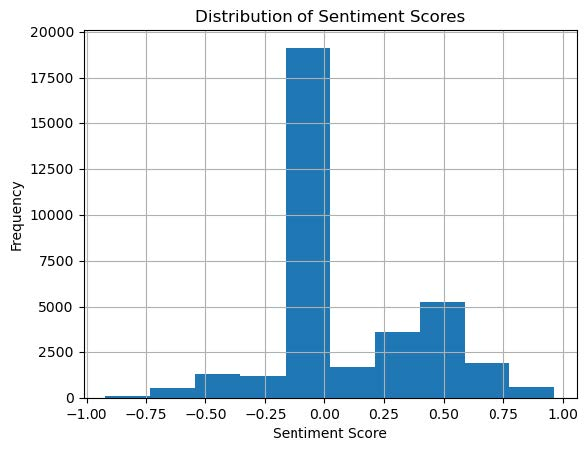

Result :

The image is a histogram showing the distribution of sentiment scores with frequency. The x-axis represents the sentiment scores, ranging from -1.0 to +1.0. The y-axis represents frequency. Most of the sentiment scores are concentrated on one end of the scale around -0.75, with the highest frequency at near 1.0.

In [9]:
# set the max number of tiles in `max_num`
pixel_values = load_image('/content/PDF1.jpg', max_num=12).to(torch.bfloat16).cuda()
generation_config = dict(max_new_tokens=1024, do_sample=True)

In [10]:
# single-image single-round conversation (单图单轮对话)
question = '<image>\nPlease describe the image shortly.'
response = model.chat(tokenizer, pixel_values, question, generation_config)
print(f'User: {question}\nAssistant: {response}')

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


User: <image>
Please describe the image shortly.
Assistant: The image is a histogram showing the distribution of sentiment scores with frequency. The x-axis represents the sentiment scores, ranging from -1.0 to +1.0. The y-axis represents frequency. Most of the sentiment scores are concentrated on one end of the scale around -0.75, with the highest frequency at near 1.0.


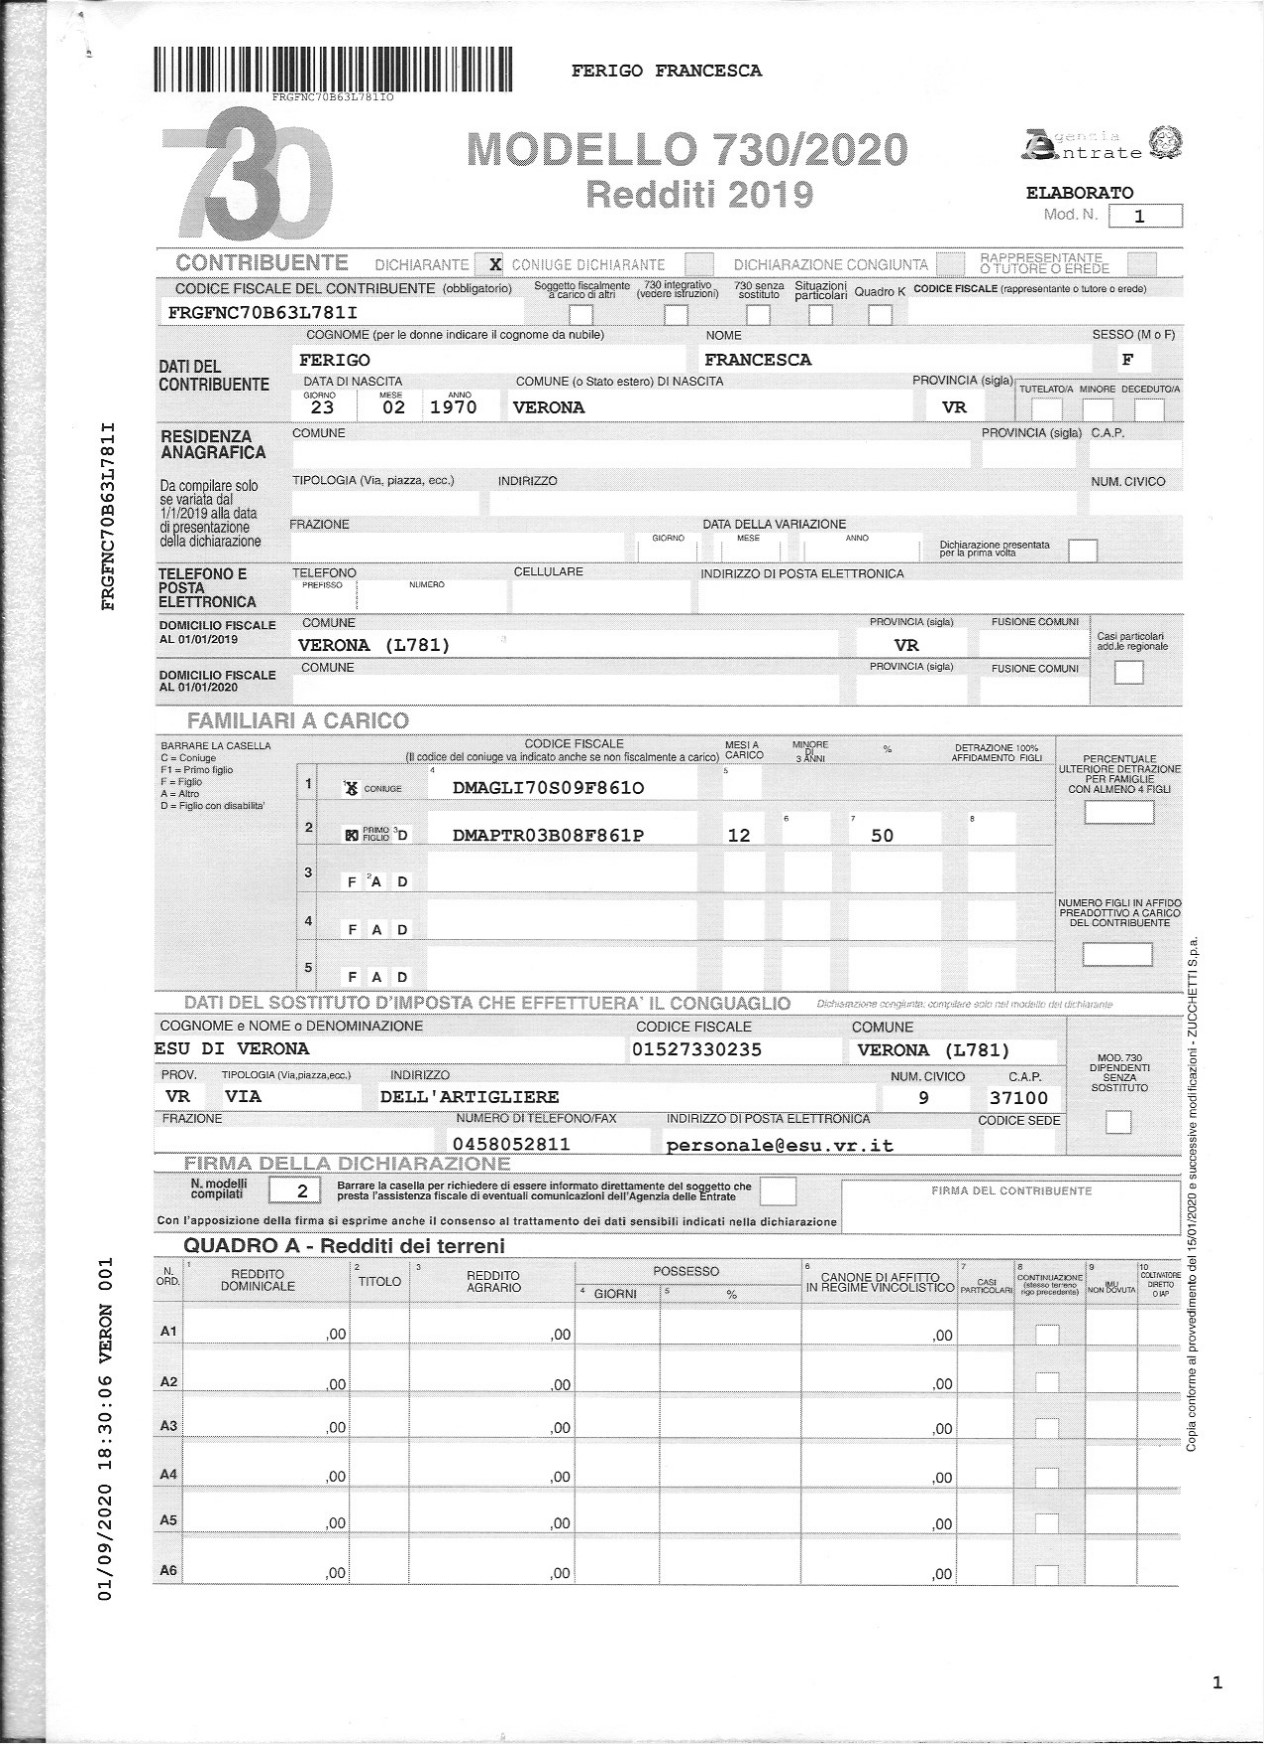

---

**Ferigo Francesca**

**Codice fiscale del contribuente:**
FRGFCN708B63L781I

**Codici di fattura:**
F/700 integrativo di risarto

**Cognome prima per numero indicare il cognome da nube:**
FERICO

**Nome prima:**
FRANCESCO

**Indirizzo Residential:**
COMUNE: VERONA
RADIOGRAFI. (n° 1970)
PROVINCE (Sigla) C. AP. (Sigla) VR
STATUTA Cittadinata/Aggiuntiva (Dopo il primo anno)
MORO (Numero di casella) N01 (Numero di casella)

**Data di nascita: date in modellino del numero indicato al numero di casella:**
MORO 02

**Telefono del lavoro:**
NOME
INDIRIZZO
INDIRIZZO

**Cellule:**
NOME
DIMAC (FID. SODIO)
ANNUALE
1/1/2019 IN MOD. DI 2010

**Telefono di posta elettronica:**
NOME
INDIRIZZO

**Domestici fiscale:**
COMUNE VERONA (L781)

**Codice fiscale di addestramento fisicale di fiscale:**
DMI GL70S09F8610

**Minore:**
50

**Numero di case:**
4

**Indirizzo di lavorazione:**
NRN 0458052811

**Firma del contribuente:**
VERONA (L781)
DRG 01275930235

**Codice di dichiare fiscale:
37100

**Modalità di addestramento fiscale:**
DEL ISSUTO CHE EFFETTUAERIA L'IMPOSTA CHE EFFETTUAERIA IL CONGUAGLIO

**Cognome e nome della famiglia:**
ESU DI VERONA

**Indirizzo e numero di telefoni e posta elettronica di famiglia:**
NUMERO DI TEL. FAX INDIRIZZO DI POSTA
PERSONALE @ esu.vr.it

**Indirizzo di lavoro del defensor di famiglia:**
INDIRIZZI DO VENDO, ALLE SPAZIO NON COMUNI C/ TUTELA-ADDE
CONNOSTANTE NA

**Cognome e nome del defensor di famiglia da compreso la casella:**
ESU DI VERONA.

---

This text covers the information such as names, dates, addresses, and addresses related to the data of a person declared as a "contribuente", including the code numbers, contact details, etc.

In [14]:
# set the max number of tiles in `max_num`
pixel_values = load_image('/content/modello-730-2020-FERIGO-FRANCESCA.jpg', max_num=12).to(torch.bfloat16).cuda()
generation_config = dict(max_new_tokens=1024, do_sample=True)

In [15]:
# single-image single-round conversation (单图单轮对话)
question = '<image>\nRead and Extract the information from the image.'
response = model.chat(tokenizer, pixel_values, question, generation_config)
print(f'User: {question}\nAssistant: {response}')

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


User: <image>
Read and Extract the information from the image.
Assistant: Sure, here is the extracted information from the image:

---

**Ferigo Francesca**

**Codice fiscale del contribuente:**
FRGFCN708B63L781I

**Codici di fattura:**
F/700 integrativo di risarto

**Cognome prima per numero indicare il cognome da nube:**
FERICO

**Nome prima:**
FRANCESCO

**Indirizzo Residential:**
COMUNE: VERONA
RADIOGRAFI. (n° 1970)
PROVINCE (Sigla) C. AP. (Sigla) VR
STATUTA Cittadinata/Aggiuntiva (Dopo il primo anno)
MORO (Numero di casella) N01 (Numero di casella)

**Data di nascita: date in modellino del numero indicato al numero di casella:**
MORO 02

**Telefono del lavoro:**
NOME
INDIRIZZO
INDIRIZZO

**Cellule:**
NOME
DIMAC (FID. SODIO)
ANNUALE
1/1/2019 IN MOD. DI 2010

**Telefono di posta elettronica:**
NOME
INDIRIZZO

**Domestici fiscale:**
COMUNE VERONA (L781)

**Codice fiscale di addestramento fisicale di fiscale:**
DMI GL70S09F8610

**Minore:**
50

**Numero di case:**
4

**Indirizzo di la

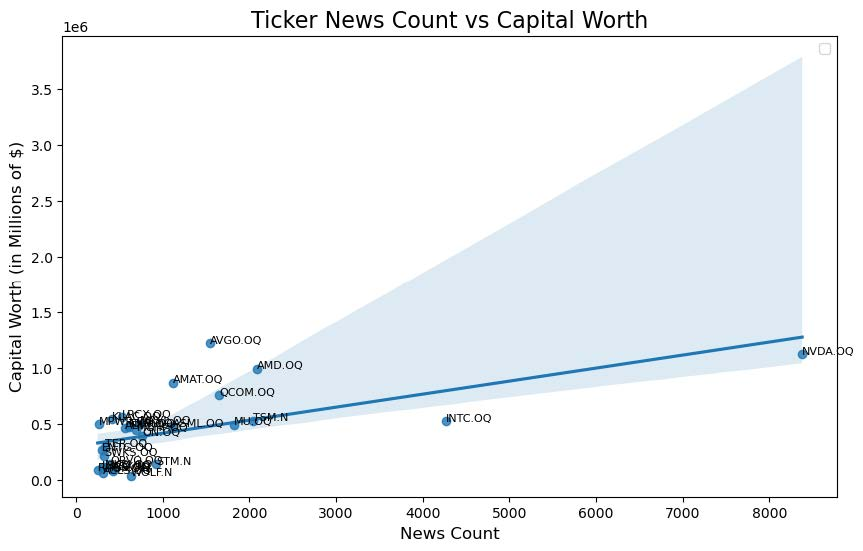

The image is a scatter plot graph titled "Ticker News Count vs Capital Worth." X-axis represents the "News Count" in millions, ranging from 0 to 1e6. Y-axis represents "Capital Worth" in millions of dollars, also from 0 to 1e6. The data points are clustered around a general trend, with a noticeable positive correlation between News Count and Capital Worth.

Here are some observations:

1. **Positive Correlation:** There is a clear upward trend, suggesting that as the news count (in millions) increases, the capital worth of the company also increases. This could indicate more investment or publicity in the stock market impacting its value.

2. **Clusters of Data Points:** There are clusters in the graph, each labeled with ticker symbols. The clusters are more concentrated near the lower end of the News Count (approximately 0-1000 millions) and corresponding to lower Capital Worth (closer to 0-5 million millions for some of them).

3. **Larger Clusters:**
   - A cluster near NVDA.Q has a notably larger spread between News Count (approaching 1.5 million millions) but a relatively higher Capital Worth (approaching 10 million dollars).
   - Some smaller clusters, e.g., AY.N.CO, MVK.OQ, and MMR.LQ, show more moderate spreads and moderate Capital Worth values.

4. **Notable Graph Trends:** The cluster labeled NVDA.Q prominently features the largest spread, which implies significant value difference despite the increased News Count. Other clusters, like AY.N.CO and MVK.OQ, depict smaller deviations but still indicate substantial value growth.

To summarize, this scatter plot visually represents the relationship between news volume and capital worth in stocks, highlighting clusters of higher and lower values and showing the positive correlation where a significant investment in news leads to a disproportionate growth in the company's capital worth.

In [16]:
# set the max number of tiles in `max_num`
pixel_values = load_image('/content/PDF1_2.jpg', max_num=12).to(torch.bfloat16).cuda()
generation_config = dict(max_new_tokens=1024, do_sample=True)

In [17]:
# single-image single-round conversation (单图单轮对话)
question = '<image>\nAnalyze and Describe this image.'
response = model.chat(tokenizer, pixel_values, question, generation_config)
print(f'User: {question}\nAssistant: {response}')

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


User: <image>
Analyze and Describe this image.
Assistant: The image is a scatter plot graph titled "Ticker News Count vs Capital Worth." X-axis represents the "News Count" in millions, ranging from 0 to 1e6. Y-axis represents "Capital Worth" in millions of dollars, also from 0 to 1e6. The data points are clustered around a general trend, with a noticeable positive correlation between News Count and Capital Worth. 

Here are some observations:

1. **Positive Correlation:** There is a clear upward trend, suggesting that as the news count (in millions) increases, the capital worth of the company also increases. This could indicate more investment or publicity in the stock market impacting its value.

2. **Clusters of Data Points:** There are clusters in the graph, each labeled with ticker symbols. The clusters are more concentrated near the lower end of the News Count (approximately 0-1000 millions) and corresponding to lower Capital Worth (closer to 0-5 million millions for some of them)